# <font color='redaqua'> Portfolio Optimization:

### What is Portfolio Optimization?
Portfolio optimization is the process of selecting a combination of assets for investment in order to maximize returns or minimize risk. The goal of portfolio optimization is to find the optimal mix of assets that will provide the highest level of return for a given level of risk.

There are different types of portfolio optimization models that can be used, including:

* Mean-variance optimization: This model uses historical data on asset returns and variances to optimize the portfolio for the highest expected return for a given level of risk.

* Risk parity: This model aims to create a portfolio in which the risk of each asset is proportional to its expected return.

* Black-Litterman model: This model allows investors to incorporate their own views on the future returns of different assets in the portfolio optimization process.

* Monte Carlo Simulation  models: A Monte Carlo simulation is used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty.

In practice, portfolio optimization is a complex task that requires significant expertise and knowledge of financial markets. The choice of optimization model, as well as the assumptions and inputs used, can have a significant impact on the results. It's important to use appropriate assumptions and inputs for the optimization and also consider other factors such as liquidity, regulatory constraints, and transaction costs.

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize
import warnings
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
init_notebook_mode(connected = True) 
pd.set_option('display.max_columns', 100)
warnings.filterwarnings("ignore")


# 1. Mean Variance

Mean-variance analysis is a mathematical framework used in finance to analyze and optimize portfolios of assets. It is based on the idea that investors are risk-averse and seek to maximize the expected return of their portfolio while minimizing its risk. The risk is measured by the volatility of the portfolio returns, which is quantified by the portfolio's variance or standard deviation.

The mean-variance analysis consists of two main components:

The expected return of a portfolio: The expected return of a portfolio is the weighted average of the expected returns of the individual assets in the portfolio. It is calculated using the following formula:
E(Rp) = w1 * E(R1) + w2 * E(R2) + ... + wn * E(Rn)

Where:
E(Rp) is the expected return of the portfolio
E(Ri) is the expected return of the ith asset
wi is the weight of the ith asset in the portfolio

The variance or standard deviation of a portfolio: The variance of a portfolio is a measure of the dispersion of the portfolio returns around its expected return. It is calculated using the following formula:
σp² = w1²σ1² + w2²σ2² + 2w1w2σ1σ2cov(1,2) + ... + 2w1wnσ1σncov(1,n) + ... + 2wn-1wnσn-1σncov(n-1,n)

Where:
σp² is the variance of the portfolio returns
σi² is the variance of the returns of the ith asset
wi is the weight of the ith asset in the portfolio
cov(i,j) is the covariance between the returns of the ith and jth assets

The goal of mean-variance analysis is to find the portfolio weights that maximize the expected return while minimizing the risk, this is done by minimizing the variance of the portfolio.

The optimization problem is usually solved using mathematical optimization techniques, such as quadratic programming, to find the optimal portfolio weights.

https://www.investopedia.com/terms/m/meanvariance-analysis.asp

In [2]:
# Calculating Mean Variance

def mean_variance_portfolio(tickers, start_date, end_date):
    data = yf.download(tickers, start_date, end_date)["Adj Close"]

    returns = data.pct_change()[1:]
    n = returns.shape[1]
    initial_guess = np.ones(n) / n

    def portfolio_variance(weights):
        portfolio_return = np.dot(weights, returns.mean()) * 252
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
        return portfolio_volatility
    
    def portfolio_return(weights):
        return np.dot(weights, returns.mean()) * 252
    
    def neg_sharpe_ratio(weights):
        p_var = portfolio_variance(weights)
        p_ret = portfolio_return(weights)
        return -(p_ret - 0.03) / p_var
    
    bounds = [(0, 1) for i in range(n)]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    optimized = minimize(neg_sharpe_ratio, initial_guess, bounds = bounds, constraints = constraints)
    return optimized.x

In [3]:
stock_list = ['AAPL', 'MSFT','AMZN', 'CVX', 'NVDA', 'KO', 'MCD', 'WFC', 'NFLX', 'NKE']
benchmark = ["^GSPC"]
start_date = "2020-01-01" 
end_date = "2023-01-01"
df = yf.download(stock_list, start = start_date, end = end_date)["Adj Close"]
benchmark = yf.download(benchmark, start_date, end_date)["Adj Close"]
daily_rtn = df.pct_change().dropna()
ann_rtn = daily_rtn.mean() * 252


max_return = mean_variance_portfolio(stock_list, start_date, end_date)
max_return

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed

1 Failed download:
- WFC: No data found for this date range, symbol may be delisted


array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [4]:
portfolio_rtn = daily_rtn * max_return
portfolio_rtn.head()

,AAPL,AMZN,CVX,KO,MCD,MSFT,NFLX,NKE,NVDA,WFC
Date,,,,,,,,,,
2020-01-03 00:00:00-05:00,-0.000972,-0.001214,-0.000346,-0.000546,-0.000354,-0.001245,-0.001186,-0.000274,-0.001601,-0.000614
2020-01-06 00:00:00-05:00,0.000797,0.001489,-0.000339,-0.000037,0.001125,0.000258,0.003047,-0.000088,0.000419,-0.000599
2020-01-07 00:00:00-05:00,-0.000470,0.000209,-0.001277,-0.000768,0.000148,-0.000912,-0.001513,-0.000049,0.001211,-0.000829
2020-01-08 00:00:00-05:00,0.001609,-0.000781,-0.001142,0.000184,0.001619,0.001593,0.002573,-0.000226,0.000188,0.000304
2020-01-09 00:00:00-05:00,0.002124,0.000480,-0.000161,0.001822,0.001185,0.001249,-0.001061,-0.000069,0.001098,-0.000170


In [5]:
portfolio = portfolio_rtn.sum(axis = 1)
total_return = (1 + portfolio).cumprod()
pd.DataFrame(portfolio)
total_return

Date
2020-01-03 00:00:00-05:00    0.991650
2020-01-06 00:00:00-05:00    0.997671
2020-01-07 00:00:00-05:00    0.993431
2020-01-08 00:00:00-05:00    0.999312
2020-01-09 00:00:00-05:00    1.005804
                               ...   
2022-12-23 00:00:00-05:00    1.500659
2022-12-27 00:00:00-05:00    1.481681
2022-12-28 00:00:00-05:00    1.461159
2022-12-29 00:00:00-05:00    1.493156
2022-12-30 00:00:00-05:00    1.492770
Length: 755, dtype: float64

In [6]:
# Create Figure
fig = go.Figure()

# Add the daily return trace to the chart
fig.add_trace(go.Scatter(x = portfolio.index, y = portfolio, name='Daily Returns',
                         line=dict(color='red', width=2)))

# Add the total return trace to the chart
fig.add_trace(go.Scatter(x = total_return.index, y = total_return, name='Total Returns',
                         yaxis='y2',line=dict(color='blue', width=2)))

# Set the x and y axis titles
fig.update_layout(xaxis_title='Date', yaxis_title='Daily Returns', yaxis2=dict(title='Total Returns', overlaying='y',
                                                                             side='right'))
# Add a legend
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal',
                     font=dict(family='sans-serif', size=12, color='black'), bgcolor='white', bordercolor='black', borderwidth=2))

In [7]:
bench_rtn = benchmark.pct_change()
total_return_bench  = (1 + bench_rtn).cumprod().dropna()
total_return_bench = pd.DataFrame(total_return_bench)
total_return_bench

,Adj Close
Date,
2020-01-03 00:00:00-05:00,0.992940
2020-01-06 00:00:00-05:00,0.996449
2020-01-07 00:00:00-05:00,0.993655
2020-01-08 00:00:00-05:00,0.998527
2020-01-09 00:00:00-05:00,1.005172
...,...
2022-12-23 00:00:00-05:00,1.180171
2022-12-27 00:00:00-05:00,1.175392
2022-12-28 00:00:00-05:00,1.161263


In [8]:
df3 = pd.merge(pd.DataFrame(total_return), total_return_bench, how = "inner", on = "Date")
df3

,0,Adj Close
Date,,
2020-01-03 00:00:00-05:00,0.991650,0.992940
2020-01-06 00:00:00-05:00,0.997671,0.996449
2020-01-07 00:00:00-05:00,0.993431,0.993655
2020-01-08 00:00:00-05:00,0.999312,0.998527
2020-01-09 00:00:00-05:00,1.005804,1.005172
...,...,...
2022-12-23 00:00:00-05:00,1.500659,1.180171
2022-12-27 00:00:00-05:00,1.481681,1.175392
2022-12-28 00:00:00-05:00,1.461159,1.161263


In [9]:
df3.rename(columns = {0: "Portfolio", "Adj Close":"SP500"}, inplace = True)
df3.head()

,Portfolio,SP500
Date,,
2020-01-03 00:00:00-05:00,0.991650,0.992940
2020-01-06 00:00:00-05:00,0.997671,0.996449
2020-01-07 00:00:00-05:00,0.993431,0.993655
2020-01-08 00:00:00-05:00,0.999312,0.998527
2020-01-09 00:00:00-05:00,1.005804,1.005172


In [10]:
# Create Figure
fig = go.Figure()

# Add the portfolio return trace to the chart
fig.add_trace(go.Scatter(x = df3.index, y = df3["Portfolio"], name = "Portfolio Returns", 
                        line = dict(color = "red", width = 2)))

# Add the benchmark return trace to the chart
fig.add_trace(go.Scatter(x = df3.index, y = df3["SP500"], name = "SP500", 
                        line = dict(color = "blue", width = 2)))

# Add the portfolio return trace to the chart
fig.update_layout(xaxis_title = "Date", yaxis_title = "Returns")

# Set the x and y axis titles
fig.update_layout(title = "Portfolio vs SP500")

# Add a legend
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal',
                     font=dict(family='sans-serif', size=12, color='black'), bgcolor='white', bordercolor='black', borderwidth=2))

fig.show()

# 2. Monte Carlo Simulation

Monte Carlo simulation is a method of using random sampling to model and analyze complex systems. It is used to estimate the probability of different outcomes in a system, by repeatedly generating random samples of inputs and observing the resulting outputs.

The basic idea behind Monte Carlo simulation is to use random sampling to generate a large number of possible inputs (or scenarios), and then use these samples to estimate the probability distribution of the outputs. The process is repeated many times to generate a large number of possible outcomes and the results are analyzed to gain insights about the system.

There are a few steps in a Monte Carlo simulation:

Define the inputs (or variables) of the system that are uncertain or have a probability distribution
Generate a large number of random samples of the inputs, using their probability distributions
Use these random samples to run the model and calculate the outputs
Analyze the outputs to gain insights about the system, such as the probability distribution of the outputs, or the expected values of the outputs.
The Monte Carlo simulation can be represented by the following formula:

O = f(I)

Where:
O is the output of the system
f is the mathematical model or function that describes the relationship between the inputs and outputs of the system
I is the vector of inputs of the system

In financial modeling, Monte Carlo simulation is commonly used to model the uncertainty of future prices of assets and to estimate the probability of different outcomes of a portfolio. The simulation generates a large number of possible scenarios for the future prices of the assets, based on the probability distributions of the returns, and calculates the resulting portfolio values.

The results of the simulation can be used to estimate the probability distribution of the portfolio returns and to identify the potential outcomes that are most likely or least likely to occur.

https://www.investopedia.com/terms/m/montecarlosimulation.asp

In [11]:
# Monte Carlo Simulation: 100k Portfolios

stock_list = ['AAPL', 'MSFT','AMZN', 'CVX', 'NVDA', 'KO', 'MCD', 'WFC', 'NFLX', 'NKE']
benchmark = ["^GSPC"]
start_date = "2020-01-01" 
end_date = "2023-01-01"
df = yf.download(stock_list, start = start_date, end = end_date)["Adj Close"]
benchmark = yf.download(benchmark, start_date, end_date)["Adj Close"]
daily_rtn = df.pct_change().dropna()
ann_rtn = daily_rtn.mean() * 252
daily_cov = daily_rtn.cov()
ann_cov = daily_cov * 252

port_rtn = []
port_vol = []
stock_w = []

num_assets = len(stock_list)
num_port = 100000

for i in range(num_port):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, ann_rtn)
    volatility = np.sqrt(np.dot(weights.T, (np.dot(ann_cov, weights))))

    port_rtn.append(returns)
    port_vol.append(volatility)
    stock_w.append(weights)

portfolio = {"Returns": port_rtn, "Volatility": port_vol}

for i, stock in enumerate(stock_list):
    portfolio[stock + " weight"] = [weight[i] for weight in stock_w]

    df = pd.DataFrame(portfolio)

df_sort = df.sort_values(by = ['Returns'], ascending = False)
max_rtn = df_sort[:1]
max_rtn.drop(["Returns", "Volatility"], axis = 1, inplace = True)
max_rtn_weight = np.array(max_rtn)


[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df.tail()

,Returns,Volatility,AAPL weight,MSFT weight,AMZN weight,CVX weight,NVDA weight,KO weight,MCD weight,WFC weight,NFLX weight,NKE weight
99995,0.142969,0.311821,0.085053,0.090800,0.025948,0.009798,0.037731,0.104560,0.221264,0.215765,0.059117,0.149964
99996,0.178818,0.304747,0.131964,0.059751,0.116127,0.098264,0.021435,0.031446,0.083379,0.096389,0.135066,0.226181
99997,0.165202,0.284554,0.148273,0.041745,0.128626,0.038315,0.146851,0.011968,0.135430,0.194931,0.042154,0.111708
99998,0.181997,0.278633,0.248445,0.077529,0.120307,0.042411,0.198405,0.068572,0.074308,0.058517,0.035560,0.075946
99999,0.179738,0.281862,0.074831,0.151751,0.104512,0.137244,0.155009,0.003951,0.019066,0.141989,0.143075,0.068571


In [13]:
df_sort.head()

,Returns,Volatility,AAPL weight,MSFT weight,AMZN weight,CVX weight,NVDA weight,KO weight,MCD weight,WFC weight,NFLX weight,NKE weight
30773,0.290958,0.370271,0.240064,0.001250,0.034173,0.078702,0.012732,0.134173,0.079846,0.040315,0.369459,0.009286
57060,0.290635,0.374368,0.227620,0.019287,0.011985,0.092574,0.005948,0.101229,0.057663,0.089771,0.393284,0.000638
33281,0.286821,0.366328,0.031360,0.035994,0.204247,0.028358,0.014038,0.072005,0.049395,0.073343,0.406539,0.084721
65544,0.284791,0.337208,0.136983,0.006685,0.236205,0.085621,0.073507,0.027037,0.055323,0.025713,0.329013,0.023913
1166,0.276707,0.348888,0.071444,0.050694,0.176353,0.065078,0.017293,0.203593,0.026105,0.013075,0.333529,0.042835


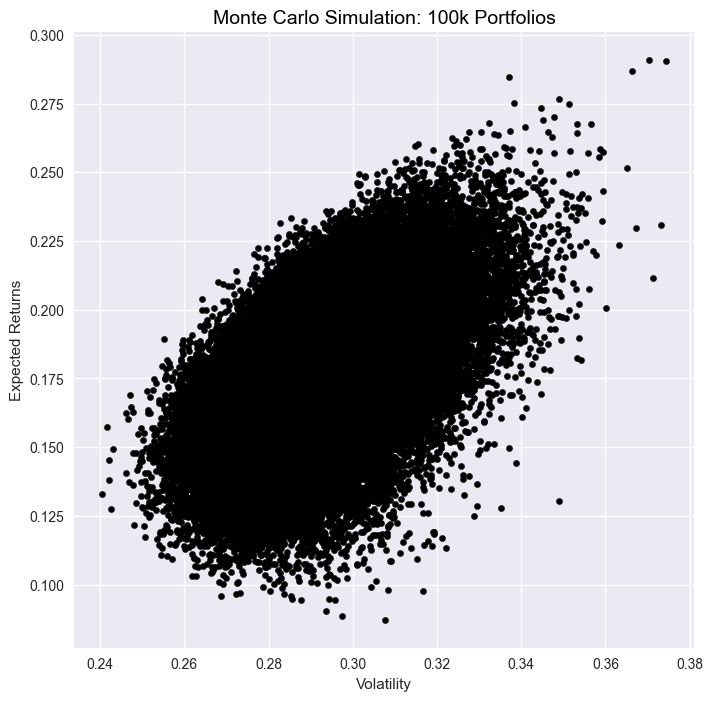

In [14]:
plt.style.use('seaborn')
df.plot.scatter(x  = 'Volatility', y = 'Returns', figsize = (8,8), grid = True, c = "black")
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title("Monte Carlo Simulation: 100k Portfolios", color = "black", fontsize = 14)
plt.show()

In [15]:
max_rtn 

,AAPL weight,MSFT weight,AMZN weight,CVX weight,NVDA weight,KO weight,MCD weight,WFC weight,NFLX weight,NKE weight
30773,0.240064,0.00125,0.034173,0.078702,0.012732,0.134173,0.079846,0.040315,0.369459,0.009286


In [16]:
max_rtn_weight = np.array(max_rtn)
max_rtn_weight

array([[0.24006435, 0.00124962, 0.03417284, 0.07870177, 0.01273172,
        0.1341726 , 0.07984619, 0.04031549, 0.36945914, 0.00928627]])

In [17]:
portfolio_rtn = daily_rtn * max_rtn_weight 
portfolio_rtn.head()

,AAPL,AMZN,CVX,KO,MCD,MSFT,NFLX,NKE,NVDA,WFC
Date,,,,,,,,,,
2020-01-03 00:00:00-05:00,-0.002334,-0.000015,-0.000118,-0.000429,-0.000045,-0.001671,-0.000947,-0.000110,-0.005914,-0.000057
2020-01-06 00:00:00-05:00,0.001913,0.000019,-0.000116,-0.000029,0.000143,0.000347,0.002433,-0.000036,0.001549,-0.000056
2020-01-07 00:00:00-05:00,-0.001129,0.000003,-0.000436,-0.000605,0.000019,-0.001223,-0.001208,-0.000020,0.004473,-0.000077
2020-01-08 00:00:00-05:00,0.003862,-0.000010,-0.000390,0.000145,0.000206,0.002137,0.002054,-0.000091,0.000693,0.000028
2020-01-09 00:00:00-05:00,0.005099,0.000006,-0.000055,0.001434,0.000151,0.001676,-0.000847,-0.000028,0.004058,-0.000016


In [18]:
portfolio = portfolio_rtn.sum(axis = 1)
total_return = (1 + portfolio).cumprod()
pd.DataFrame(portfolio)
total_return

Date
2020-01-03 00:00:00-05:00    0.988360
2020-01-06 00:00:00-05:00    0.994456
2020-01-07 00:00:00-05:00    0.994254
2020-01-08 00:00:00-05:00    1.002838
2020-01-09 00:00:00-05:00    1.014348
                               ...   
2022-12-23 00:00:00-05:00    1.978119
2022-12-27 00:00:00-05:00    1.914229
2022-12-28 00:00:00-05:00    1.884997
2022-12-29 00:00:00-05:00    1.943849
2022-12-30 00:00:00-05:00    1.945408
Length: 755, dtype: float64

In [19]:
fig = go.Figure()

# Add the daily return trace to the chart
fig.add_trace(go.Scatter(x = portfolio.index, y = portfolio, name='Daily Returns',
                         line=dict(color='red', width=2)))

# Add the total return trace to the chart
fig.add_trace(go.Scatter(x = total_return.index, y = total_return, name='Total Returns',
                         yaxis='y2',line=dict(color='blue', width=2)))

# Set the x and y axis titles
fig.update_layout(xaxis_title='Date', yaxis_title='Daily Returns', yaxis2=dict(title='Total Returns', overlaying='y',
                                                                             side='right'))
# Add a legend
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal',
                     font=dict(family='sans-serif', size=12, color='black'), bgcolor='white', bordercolor='black', borderwidth=2))

fig.show()

In [20]:
bench_rtn = benchmark.pct_change()
total_return_bench  = (1 + bench_rtn).cumprod().dropna()
total_return_bench = pd.DataFrame(total_return_bench)
total_return_bench

,Adj Close
Date,
2020-01-03 00:00:00-05:00,0.992940
2020-01-06 00:00:00-05:00,0.996449
2020-01-07 00:00:00-05:00,0.993655
2020-01-08 00:00:00-05:00,0.998527
2020-01-09 00:00:00-05:00,1.005172
...,...
2022-12-23 00:00:00-05:00,1.180171
2022-12-27 00:00:00-05:00,1.175392
2022-12-28 00:00:00-05:00,1.161263


In [21]:
df2 = pd.merge(pd.DataFrame(total_return), total_return_bench, how = "inner", on = "Date")
df2

,0,Adj Close
Date,,
2020-01-03 00:00:00-05:00,0.988360,0.992940
2020-01-06 00:00:00-05:00,0.994456,0.996449
2020-01-07 00:00:00-05:00,0.994254,0.993655
2020-01-08 00:00:00-05:00,1.002838,0.998527
2020-01-09 00:00:00-05:00,1.014348,1.005172
...,...,...
2022-12-23 00:00:00-05:00,1.978119,1.180171
2022-12-27 00:00:00-05:00,1.914229,1.175392
2022-12-28 00:00:00-05:00,1.884997,1.161263


In [22]:
df2.rename(columns = {0: "Portfolio", "Adj Close":"SP500"}, inplace = True)
df2.head()

,Portfolio,SP500
Date,,
2020-01-03 00:00:00-05:00,0.988360,0.992940
2020-01-06 00:00:00-05:00,0.994456,0.996449
2020-01-07 00:00:00-05:00,0.994254,0.993655
2020-01-08 00:00:00-05:00,1.002838,0.998527
2020-01-09 00:00:00-05:00,1.014348,1.005172


In [23]:
# Create Figure
fig = go.Figure()

# Add the portfolio return trace to the chart
fig.add_trace(go.Scatter(x = df2.index, y = df2["Portfolio"], name = "Portfolio Returns", 
                        line = dict(color = "red", width = 2)))

# Add the benchmark return trace to the chart
fig.add_trace(go.Scatter(x = df2.index, y = df2["SP500"], name = "SP500", 
                        line = dict(color = "blue", width = 2)))

# Add the portfolio return trace to the chart
fig.update_layout(xaxis_title = "Date", yaxis_title = "Returns")

# Set the x and y axis titles
fig.update_layout(title = "Portfolio vs SP500")

# Add a legend
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal',
                     font=dict(family='sans-serif', size=12, color='black'), bgcolor='white', bordercolor='black', borderwidth=2))

fig.show()


 # 3. Plotting Portfolios Optimized vs SP500

In [24]:
df3.drop(["SP500"], axis = 1, inplace = True)
df2.rename(columns = {"Portfolio": "Port_MC"}, inplace = True)
df3.rename(columns = {"Portfolio": "Port_MV"}, inplace = True)
df4 = df2.merge(df3, on = "Date", how = "inner")


In [25]:
df4

,Port_MC,SP500,Port_MV
Date,,,
2020-01-03 00:00:00-05:00,0.988360,0.992940,0.991650
2020-01-06 00:00:00-05:00,0.994456,0.996449,0.997671
2020-01-07 00:00:00-05:00,0.994254,0.993655,0.993431
2020-01-08 00:00:00-05:00,1.002838,0.998527,0.999312
2020-01-09 00:00:00-05:00,1.014348,1.005172,1.005804
...,...,...,...
2022-12-23 00:00:00-05:00,1.978119,1.180171,1.500659
2022-12-27 00:00:00-05:00,1.914229,1.175392,1.481681
2022-12-28 00:00:00-05:00,1.884997,1.161263,1.461159


In [26]:
# Create Figure
fig = go.Figure()

# Add the portfolio return trace to the chart
fig.add_trace(go.Scatter(x = df4.index, y = df4["Port_MC"], name = "Portfolio Returns Monte Carlo", 
                        line = dict(color = "red", width = 2)))

# Add the portfolio return trace to the chart
fig.add_trace(go.Scatter(x = df4.index, y = df4["Port_MV"], name = "Portfolio Returns Mean Variance", 
                        line = dict(color = "black", width = 2)))

# Add the benchmark return trace to the chart
fig.add_trace(go.Scatter(x = df4.index, y = df4["SP500"], name = "SP500", 
                        line = dict(color = "blue", width = 2)))

# Add the portfolio return trace to the chart
fig.update_layout(xaxis_title = "Date", yaxis_title = "Returns")

# Set the x and y axis titles
fig.update_layout(title = "Portfolios vs SP500")

# Add a legend
fig.update_layout(legend=dict(x=0, y=1, traceorder='normal',
                     font=dict(family='sans-serif', size=12, color='black'), bgcolor='white', bordercolor='black', borderwidth=2))

fig.show()